In [ ]:
import pandas as pd
partidos = pd.read_csv('/content/drive/MyDrive/results.csv')
partidos

,Unnamed: 0,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id
0,0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0
1,1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1
2,2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7
3,3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0
4,4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7
...,...,...,...,...,...,...,...,...
32849,32849,Nacional 1976 - Grupo C,93,Union,1,0,Velez,94
32850,32850,Metropolitano 1975 - Fecha 36,94,Velez,0,0,Union,93
32851,32851,Metropolitano 1975 - Fecha 17,93,Union,1,0,Velez,94
32852,32852,Metropolitano 1970 - Fecha 16,93,Union,1,1,Velez,94


In [ ]:
#Cambio el nombre de algunas columnas
partidos = partidos.rename(columns={'Unnamed: 0':'Id Partido',
                           'date_name':'Fecha y Torneo',
                           'local_team_id':'Id Equipo Local',
                           'local_team':'Equipo Local',
                           'local_result':'Goles Equipo Local',
                           'visitor_result':'Goles Equipo Visitante',
                           'visitor_team':'Equipo Visitante',
                           'visitor_team_id':'Id Equipo Visitante'})
partidos

,Id Partido,Fecha y Torneo,Id Equipo Local,Equipo Local,Goles Equipo Local,Goles Equipo Visitante,Equipo Visitante,Id Equipo Visitante
0,0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0
1,1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1
2,2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7
3,3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0
4,4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7
...,...,...,...,...,...,...,...,...
32849,32849,Nacional 1976 - Grupo C,93,Union,1,0,Velez,94
32850,32850,Metropolitano 1975 - Fecha 36,94,Velez,0,0,Union,93
32851,32851,Metropolitano 1975 - Fecha 17,93,Union,1,0,Velez,94
32852,32852,Metropolitano 1970 - Fecha 16,93,Union,1,1,Velez,94


In [ ]:
partidos['Gano Local'] = partidos['Goles Equipo Local']>partidos['Goles Equipo Visitante']
partidos['Gano Visitante'] = partidos['Goles Equipo Local']<partidos['Goles Equipo Visitante']
partidos

,Id Partido,Fecha y Torneo,Id Equipo Local,Equipo Local,Goles Equipo Local,Goles Equipo Visitante,Equipo Visitante,Id Equipo Visitante,Gano Local,Gano Visitante
0,0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0,True,False
1,1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1,True,False
2,2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7,False,False
3,3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0,False,True
4,4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7,True,False
...,...,...,...,...,...,...,...,...,...,...
32849,32849,Nacional 1976 - Grupo C,93,Union,1,0,Velez,94,True,False
32850,32850,Metropolitano 1975 - Fecha 36,94,Velez,0,0,Union,93,False,False
32851,32851,Metropolitano 1975 - Fecha 17,93,Union,1,0,Velez,94,True,False
32852,32852,Metropolitano 1970 - Fecha 16,93,Union,1,1,Velez,94,False,False


In [ ]:
importantes = list(partidos['Equipo Local'].value_counts().nlargest(10).index) #Me quedo con las 10 selecciones que mas aparecen 
importantes

['Boca Juniors',
 'River Plate',
 'Independiente',
 'San Lorenzo',
 'Estudiantes (LP)',
 'Velez',
 'Racing Club',
 'Newells',
 'Gimnasia (LP)',
 'Rosario Central']

In [ ]:
#Me quedo con los partidos jugados entre ellos
equipos_importantes = partidos[partidos['Equipo Local'].isin(importantes)]
equipos_importantes = equipos_importantes[equipos_importantes['Equipo Visitante'].isin(importantes)]
equipos_importantes

,Id Partido,Fecha y Torneo,Id Equipo Local,Equipo Local,Goles Equipo Local,Goles Equipo Visitante,Equipo Visitante,Id Equipo Visitante,Gano Local,Gano Visitante
8650,8650,Superliga 2019/20 - Fecha 6,17,Boca Juniors,1,0,Estudiantes (LP),37,True,False
8651,8651,Superliga 2018/19 - Fecha 2,37,Estudiantes (LP),2,0,Boca Juniors,17,True,False
8652,8652,Superliga 2017/18 - Fecha 12,37,Estudiantes (LP),0,1,Boca Juniors,17,False,True
8653,8653,Campeonato 2016/17 - Fecha 23,37,Estudiantes (LP),0,0,Boca Juniors,17,False,False
8654,8654,Torneo 2016 - Fecha 15,37,Estudiantes (LP),3,1,Boca Juniors,17,True,False
...,...,...,...,...,...,...,...,...,...,...
32345,32345,Campeonato 1933 - Fecha 8,94,Velez,1,1,San Lorenzo,77,False,False
32346,32346,Campeonato 1932 - Fecha 32,77,San Lorenzo,0,0,Velez,94,False,False
32347,32347,Campeonato 1932 - Fecha 15,94,Velez,1,4,San Lorenzo,77,False,True
32348,32348,Campeonato 1931 - Fecha 20,94,Velez,4,3,San Lorenzo,77,True,False


In [ ]:
matrix_l = equipos_importantes.pivot_table(values='Gano Local',index='Equipo Local',columns='Equipo Visitante',aggfunc='sum').fillna(0) 
matrix_l

Equipo Visitante,Boca Juniors,Estudiantes (LP),Gimnasia (LP),Independiente,Newells,Racing Club,River Plate,Rosario Central,San Lorenzo,Velez
Equipo Local,,,,,,,,,,
Boca Juniors,0.0,62.0,49.0,42.0,48.0,43.0,45.0,48.0,37.0,55.0
Estudiantes (LP),33.0,0.0,38.0,31.0,38.0,43.0,26.0,37.0,31.0,34.0
Gimnasia (LP),22.0,27.0,0.0,35.0,33.0,29.0,23.0,29.0,26.0,34.0
Independiente,36.0,40.0,35.0,0.0,42.0,38.0,34.0,43.0,37.0,31.0
Newells,27.0,42.0,36.0,33.0,0.0,36.0,28.0,31.0,32.0,31.0
Racing Club,32.0,42.0,39.0,30.0,43.0,0.0,30.0,36.0,42.0,37.0
River Plate,38.0,59.0,50.0,53.0,47.0,51.0,0.0,50.0,49.0,50.0
Rosario Central,40.0,37.0,36.0,34.0,33.0,32.0,22.0,0.0,31.0,29.0
San Lorenzo,43.0,41.0,43.0,32.0,39.0,37.0,35.0,38.0,0.0,47.0


In [ ]:
matrix_v = equipos_importantes.pivot_table(values='Gano Visitante',index='Equipo Visitante',columns='Equipo Local',aggfunc='sum').fillna(0) 
matrix_v

Equipo Local,Boca Juniors,Estudiantes (LP),Gimnasia (LP),Independiente,Newells,Racing Club,River Plate,Rosario Central,San Lorenzo,Velez
Equipo Visitante,,,,,,,,,,
Boca Juniors,0.0,40.0,31.0,28.0,19.0,36.0,28.0,20.0,28.0,30.0
Estudiantes (LP),9.0,0.0,22.0,21.0,15.0,21.0,12.0,16.0,19.0,20.0
Gimnasia (LP),10.0,17.0,0.0,19.0,11.0,9.0,10.0,9.0,11.0,13.0
Independiente,25.0,29.0,24.0,0.0,17.0,36.0,18.0,16.0,30.0,25.0
Newells,15.0,11.0,14.0,12.0,0.0,13.0,14.0,12.0,15.0,10.0
Racing Club,18.0,26.0,16.0,23.0,11.0,0.0,11.0,21.0,21.0,24.0
River Plate,27.0,34.0,35.0,22.0,28.0,39.0,0.0,28.0,23.0,37.0
Rosario Central,9.0,14.0,18.0,16.0,19.0,16.0,8.0,0.0,12.0,17.0
San Lorenzo,32.0,30.0,33.0,27.0,21.0,22.0,18.0,19.0,0.0,23.0


In [ ]:
import matplotlib.pyplot as plt #Pylplot te permite hacer cosas sencillas
import seaborn as sns #Seaborn ter permite hacer cosas mas chetas

Text(0.5, 1.0, 'Partidos ganados entre quipos importantes')

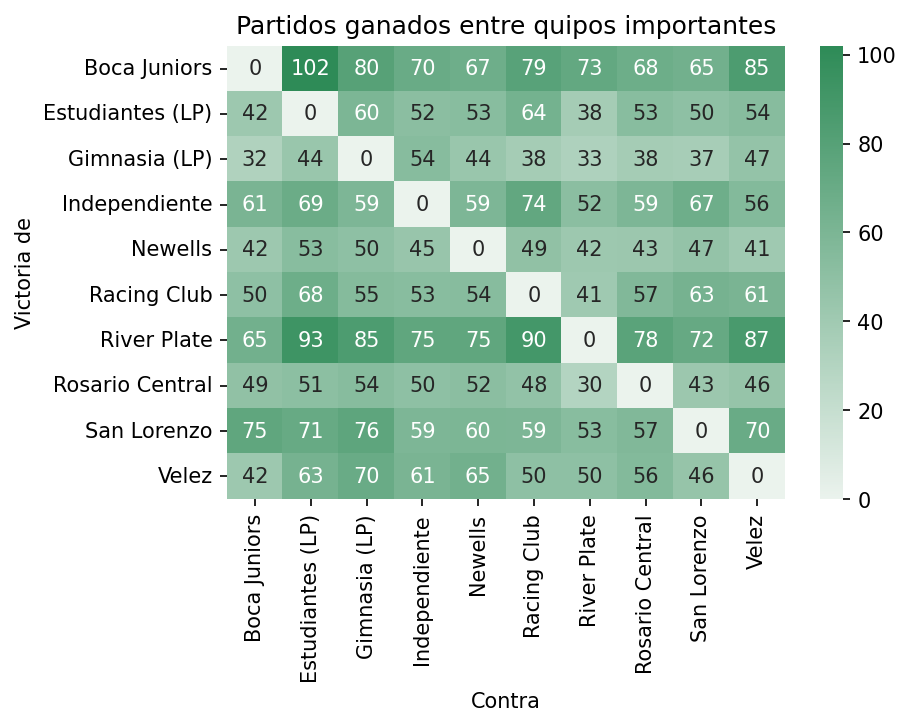

In [ ]:
plt.figure(dpi=150)
sns.heatmap(matrix_v+matrix_l, cmap=sns.light_palette('seagreen',as_cmap=True),annot = True,fmt="g") #Square hago que los cuadraditos sean cuadrado. Tener en cuenta que los gradientes de los heatmaps puedens er de varios tipos"
plt.ylabel("Victoria de")
plt.xlabel("Contra")
plt.title('Partidos ganados entre quipos importantes')